In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date

In [2]:
file_path = 'data_input/data.csv'
id = ['936','1178']

## Extract Summary

In [3]:
fb = pd.read_csv(file_path)
campaigns = fb[fb['campaign_id'].isin(id)]
campaigns = campaigns[campaigns.spent > 0]

In [5]:
campaigns.head(2)

,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
55,734210,25/08/2017,25/08/2017,936,108654,30-34,M,10,16,13,13329.0,4,5.63,1.0,1.0
56,734215,26/08/2017,26/08/2017,936,108655,30-34,M,15,19,17,13659.0,3,3.84,1.0,0.0


In [4]:
campaigns.dtypes

ad_id                    int64
reporting_start         object
reporting_end           object
campaign_id             object
fb_campaign_id          object
age                     object
gender                  object
interest1                int64
interest2                int64
interest3                int64
impressions            float64
clicks                   int64
spent                  float64
total_conversion       float64
approved_conversion    float64
dtype: object

In [6]:
# Make sure to passed in appropriate preprocessing before extracting the start and end date
campaigns['reporting_start'] = pd.to_datetime(campaigns['reporting_start'], format='%d/%m/%Y')
start_date = campaigns['reporting_start'].min().strftime(format="%d %b %Y")
end_date = campaigns['reporting_start'].max().strftime(format="%d %b %Y")

In [7]:
print('Start_date: {}'.format(start_date))
print('End date: {}'.format(end_date))

Start_date: 18 Aug 2017
End date: 30 Aug 2017


In [12]:
total_spent = int(campaigns['spent'].sum())
total_conversion = int(campaigns['total_conversion'].sum())

In [13]:
print('Total spend: {}'.format(total_spent))
print('Total conv: {}'.format(total_conversion))

Total spend: 19470
Total conv: 1398


In [14]:
# Create a cost per conversion dictionary per campaign
# Cost per conversion is spent divided by total conversion
cpc = campaigns.groupby(['campaign_id'])[['spent', 'total_conversion']].sum()
cpc['CPC'] = cpc['spent']/cpc['total_conversion']
cpc_each = dict()
for each in id:
    cpc_each[each] = round(float(cpc[cpc.index == each]['CPC']), 2)

print(cpc_each)

{'936': 8.13, '1178': 15.91}


## Create plot

In [15]:
fb = pd.read_csv(file_path, parse_dates=[1,2])
campaigns = fb[fb['campaign_id'].isin(id)]
campaigns = campaigns[campaigns.spent > 0]

# Create a grouped dataframe based on campaign id, age group, and reporting date
# Calculate the total converision of each group
grouped = campaigns.groupby(by=['campaign_id', 'age', 'reporting_start'], as_index=False)['total_conversion'].sum()

In [16]:
grouped.head()

,campaign_id,age,reporting_start,total_conversion
0,1178,30-34,2017-08-19,33.0
1,1178,30-34,2017-08-20,38.0
2,1178,30-34,2017-08-21,24.0
3,1178,30-34,2017-08-22,56.0
4,1178,30-34,2017-08-23,135.0


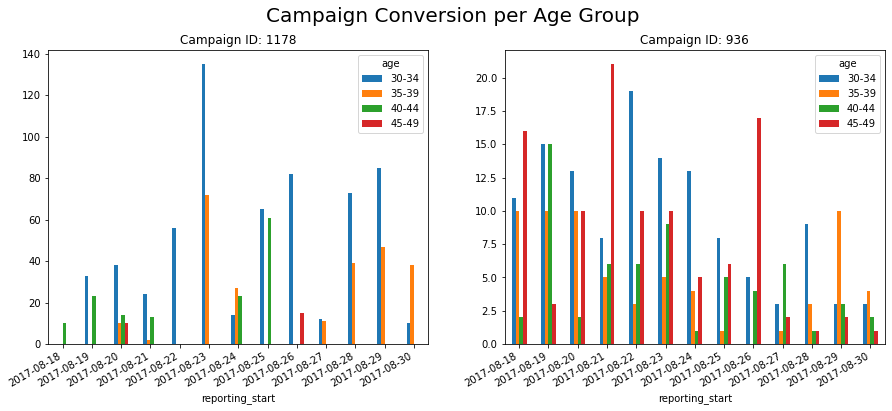

In [22]:
fig = plt.figure(1, figsize=(15,6))

# Iterate to create 1 plot campaign at a time
for i, campaign in enumerate(grouped.campaign_id.unique()):
    plt.subplot(1, len(id), i+1)

    df = grouped[grouped['campaign_id'] == campaign].loc[:,['age', 'reporting_start', 'total_conversion']]
    df['reporting_start'] = df['reporting_start'].dt.date
    pivot = df.pivot(index='reporting_start', columns='age', values='total_conversion').fillna(0)
    pivot.plot.bar(ax=plt.gca(), title='Campaign ID: {}'.format(campaign))

fig.suptitle('Campaign Conversion per Age Group', fontsize=20)
fig.autofmt_xdate()

In [25]:
# Save file to plot folder
imagename = 'plot/'+date.today().strftime(format="%d %b %Y")+'.png'
fig.savefig(imagename)